In [1]:
"""
用来批量回测做对比，变量是品种
"""
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting

from strategies.breaker.r_break_strategy_5 import RBreakStrategy
from strategies.turtle.turtle_strategy_3 import TurtleStrategy

varieties = [
    'bu8888.SHFE',
    'RB8888.SHFE',
    'SR8888.CZCE'
]

engine_array = []
for item in varieties:
    print('*****************************************')
    print(f'开始回测{item}:')

    engine = BacktestingEngine()
    engine.set_parameters(
        vt_symbol=item,
        interval="1m",
        start=datetime(2015, 1, 1),
        end=datetime(2019, 11, 15),
        rate=0.3/10000,
        slippage=0.2,
        size=10,
        pricetick=0.2, # 最小价格变动
        capital=1_000_000,
    )
    engine.add_strategy(RBreakStrategy, {'fixed_size': 50})

    engine.load_data()
    engine.run_backtesting()
    engine.calculate_result()
    engine_array.append(engine)

*****************************************
开始回测bu8888.SHFE:
2019-12-25 09:17:41.029772	开始加载历史数据
2019-12-25 09:18:11.709223	历史数据加载完成，数据量：442530
2019-12-25 09:18:11.746123	策略初始化完成
2019-12-25 09:18:11.746123	开始回放历史数据
2019-12-25 09:18:27.425312	历史数据回放结束
2019-12-25 09:18:27.426249	开始计算逐日盯市盈亏
2019-12-25 09:18:27.444198	逐日盯市盈亏计算完成
*****************************************
开始回测RB8888.SHFE:
2019-12-25 09:18:27.445242	开始加载历史数据
2019-12-25 09:19:01.732196	历史数据加载完成，数据量：442530
2019-12-25 09:19:01.765379	策略初始化完成
2019-12-25 09:19:01.765379	开始回放历史数据
2019-12-25 09:19:18.596550	历史数据回放结束
2019-12-25 09:19:18.596550	开始计算逐日盯市盈亏
2019-12-25 09:19:18.615095	逐日盯市盈亏计算完成
*****************************************
开始回测SR8888.CZCE:
2019-12-25 09:19:18.616070	开始加载历史数据
2019-12-25 09:19:51.658561	历史数据加载完成，数据量：439650
2019-12-25 09:19:51.691745	策略初始化完成
2019-12-25 09:19:51.692720	开始回放历史数据
2019-12-25 09:20:07.514712	历史数据回放结束
2019-12-25 09:20:07.514712	开始计算逐日盯市盈亏
2019-12-25 09:20:07.530325	逐日盯市盈亏计算完成


bu8888.SHFE 回测数据:
2019-12-25 09:20:07.545940	开始计算策略统计指标
2019-12-25 09:20:07.562531	------------------------------
2019-12-25 09:20:07.562531	首个交易日：	2015-01-16
2019-12-25 09:20:07.563516	最后交易日：	2019-11-14
2019-12-25 09:20:07.563516	总交易日：	1233
2019-12-25 09:20:07.563516	盈利交易日：	321
2019-12-25 09:20:07.563516	亏损交易日：	338
2019-12-25 09:20:07.563516	起始资金：	1,000,000.00
2019-12-25 09:20:07.564484	结束资金：	2,004,678.85
2019-12-25 09:20:07.564484	总收益率：	100.47%
2019-12-25 09:20:07.564484	年化收益：	19.56%
2019-12-25 09:20:07.564484	最大回撤: 	-46,866.97
2019-12-25 09:20:07.564484	百分比最大回撤: -3.62%
2019-12-25 09:20:07.564484	最长回撤天数: 	21
2019-12-25 09:20:07.564484	总盈亏：	1,004,678.85
2019-12-25 09:20:07.564484	总手续费：	116,915.15
2019-12-25 09:20:07.564484	总滑点：	298,200.00
2019-12-25 09:20:07.564484	总成交金额：	3,897,171,833.00
2019-12-25 09:20:07.564484	总成交笔数：	2982
2019-12-25 09:20:07.564484	日均盈亏：	814.82
2019-12-25 09:20:07.564484	日均手续费：	94.82
2019-12-25 09:20:07.564484	日均滑点：	241.85
2019-12-25 09:20:07.564484	日均成交金额：	3,160

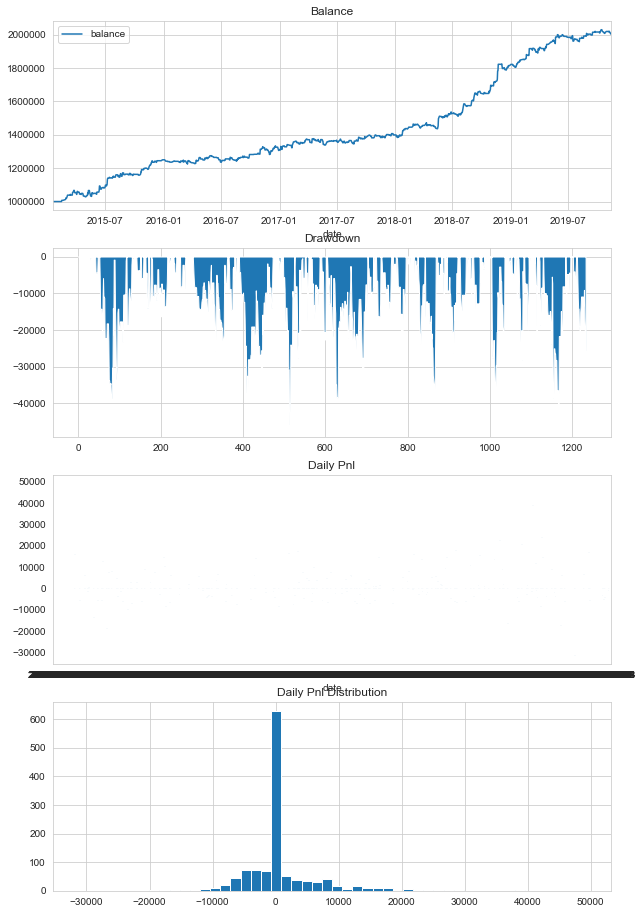

In [2]:
print(f'{varieties[0]} 回测数据:')
engine_array[0].calculate_statistics()
engine_array[0].show_chart()

RB8888.SHFE 回测数据:
2019-12-25 09:20:38.806949	开始计算策略统计指标
2019-12-25 09:20:38.820615	------------------------------
2019-12-25 09:20:38.821590	首个交易日：	2015-01-16
2019-12-25 09:20:38.821590	最后交易日：	2019-11-14
2019-12-25 09:20:38.822567	总交易日：	1233
2019-12-25 09:20:38.822567	盈利交易日：	331
2019-12-25 09:20:38.822567	亏损交易日：	338
2019-12-25 09:20:38.823542	起始资金：	1,000,000.00
2019-12-25 09:20:38.823542	结束资金：	2,263,670.83
2019-12-25 09:20:38.823542	总收益率：	126.37%
2019-12-25 09:20:38.823542	年化收益：	24.60%
2019-12-25 09:20:38.823542	最大回撤: 	-89,715.08
2019-12-25 09:20:38.823542	百分比最大回撤: -4.73%
2019-12-25 09:20:38.823542	最长回撤天数: 	42
2019-12-25 09:20:38.825494	总盈亏：	1,263,670.83
2019-12-25 09:20:38.825494	总手续费：	118,757.67
2019-12-25 09:20:38.825494	总滑点：	261,700.00
2019-12-25 09:20:38.825494	总成交金额：	3,958,588,966.50
2019-12-25 09:20:38.825494	总成交笔数：	2617
2019-12-25 09:20:38.825494	日均盈亏：	1,024.87
2019-12-25 09:20:38.825494	日均手续费：	96.32
2019-12-25 09:20:38.825494	日均滑点：	212.25
2019-12-25 09:20:38.825494	日均成交金额：	3,2

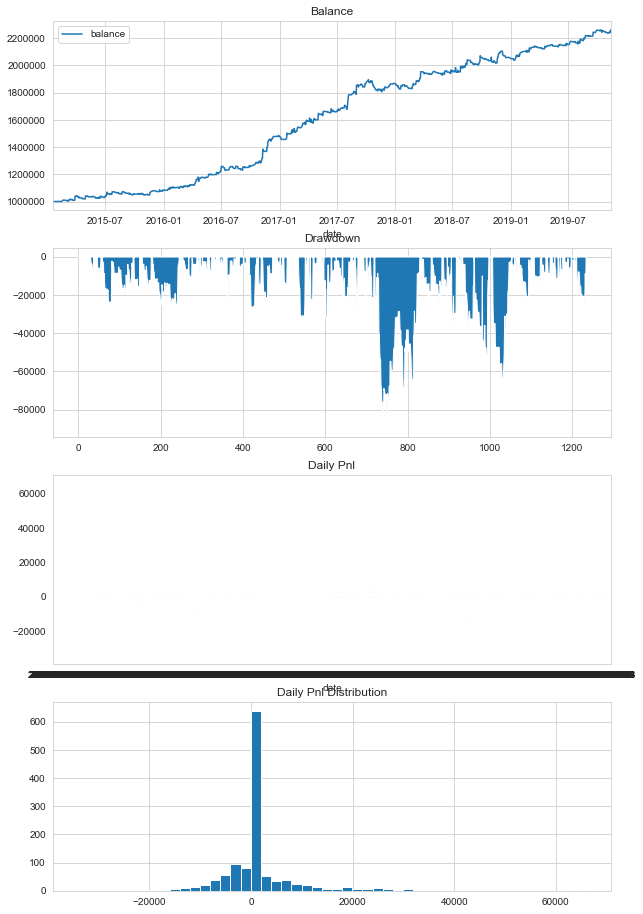

In [3]:
print(f'{varieties[1]} 回测数据:')
engine_array[1].calculate_statistics()
engine_array[1].show_chart()

SR8888.CZCE 回测数据:
2019-12-25 09:21:12.130615	开始计算策略统计指标
2019-12-25 09:21:12.146232	------------------------------
2019-12-25 09:21:12.146232	首个交易日：	2015-01-19
2019-12-25 09:21:12.146232	最后交易日：	2019-11-14
2019-12-25 09:21:12.146232	总交易日：	1176
2019-12-25 09:21:12.146232	盈利交易日：	311
2019-12-25 09:21:12.146232	亏损交易日：	361
2019-12-25 09:21:12.146232	起始资金：	1,000,000.00
2019-12-25 09:21:12.146232	结束资金：	2,114,221.66
2019-12-25 09:21:12.146232	总收益率：	111.42%
2019-12-25 09:21:12.146232	年化收益：	22.74%
2019-12-25 09:21:12.146232	最大回撤: 	-131,805.03
2019-12-25 09:21:12.146232	百分比最大回撤: -10.48%
2019-12-25 09:21:12.146232	最长回撤天数: 	133
2019-12-25 09:21:12.146232	总盈亏：	1,114,221.66
2019-12-25 09:21:12.146232	总手续费：	128,894.84
2019-12-25 09:21:12.146232	总滑点：	151,200.00
2019-12-25 09:21:12.146232	总成交金额：	4,296,494,665.50
2019-12-25 09:21:12.146232	总成交笔数：	1512
2019-12-25 09:21:12.146232	日均盈亏：	947.47
2019-12-25 09:21:12.146232	日均手续费：	109.60
2019-12-25 09:21:12.146232	日均滑点：	128.57
2019-12-25 09:21:12.146232	日均成交金额：	3

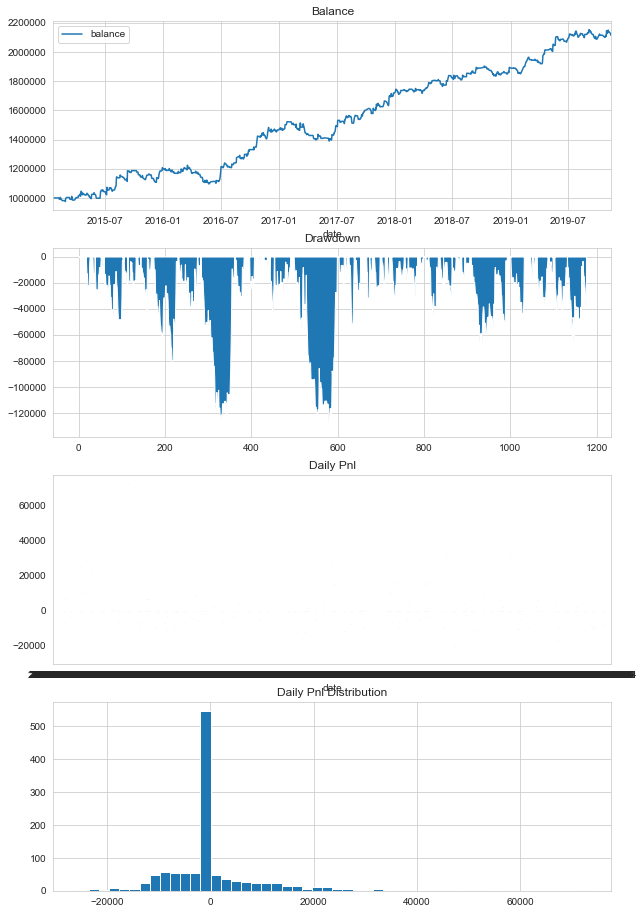

In [4]:
print(f'{varieties[2]} 回测数据:')
engine_array[2].calculate_statistics()
engine_array[2].show_chart()